In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy import stats

Para comparar datos primero se hace en scipy

In [14]:
#x, y, error
f = np.load('fit_exercise.npy')
x = f[0]
y = f[1]
err = f[2]

<ErrorbarContainer object of 3 artists>

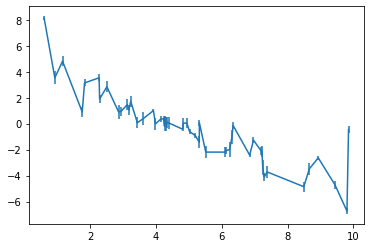

In [3]:
plt.errorbar(x, y, err) 

In [5]:
pendiente, interseccion, r_value, p_value, std_err = sp.stats.linregress(x, y)
print("pendiente: %f    interseccion: %f" % (pendiente, interseccion))
print("R-squared: %f" % r_value**2)

pendiente: -0.982162    interseccion: 4.577859
R-squared: 0.787198


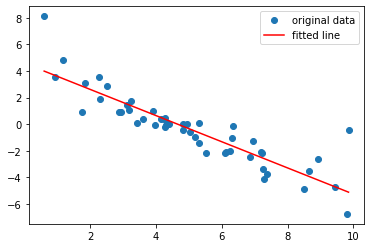

In [6]:
plt.plot(x, y, 'o', label='original data')
plt.plot(x, interseccion + pendiente*x, 'r', label='fitted line')
plt.legend()
plt.show()

Despues se hace el algoritmo de linear least squares


In [15]:
n = len(x)
E_x = sum(x)
E_y = sum(y)
E_err = sum(err)/n
E_xy = sum(x*y)
E_xx = sum(x*x)
D_m = np.sqrt(   (n*(E_err**2))   /   (n*E_xx-(E_x**2))   )
D_b = np.sqrt(   ((E_err**2)*E_xx)   /   (n*E_xx-(E_x**2))   )
m = (E_x*E_y - n*E_xy)   /   ((E_x**2)-n*E_xx)
b = (E_x*E_xy - E_y*E_xx)   /   ((E_x**2)-n*E_xx)

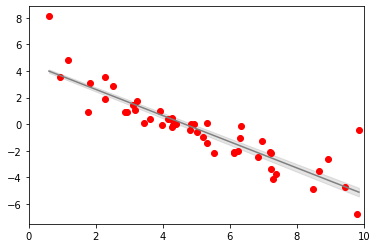

In [16]:
plt.plot(x, y, 'or')
plt.plot(x, m*x+b, '-', color='gray')
yfit = m*x + b
dyfit = D_m*x + D_b
plt.fill_between(x, yfit - dyfit, yfit + dyfit,
                 color='gray', alpha=0.2)
plt.xlim(0, 10);

A continuación se muestran las diferencias entre el método de scipy y el método que se discute en las notas
para regresión lineal

In [17]:
diferencia_pend = m-pendiente
diferencia_inter = b-interseccion
print('la diferencia en la pendiente es:',diferencia_pend,'la diferencia en la interseccion es:', diferencia_inter) 


la diferencia en la pendiente es: -2.886579864025407e-15 la diferencia en la interseccion es: 1.509903313490213e-14
